In [1]:
import numpy as np
train_set = np.load('hw3_material/svm/task1/train_set.npy') 
train_lbs = np.load('hw3_material/svm/task1/train_labels.npy')

In [6]:
!/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 6.9 MB 2.0 MB/s            
     |████████████████████████████████| 306 kB 2.6 MB/s            


In [14]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC

In [15]:
def draw_svm(clf, x, y, x1_min, x1_max, x2_min, x2_max, target=None):
    """
    Draws the decision boundary of an svm.
    :param clf: sklearn.svm.SVC classifier
    :param x: data Nx2
    :param y: label N
    :param x1_min: minimum value of the x-axis of the plot
    :param x1_max: maximum value of the x-axis of the plot
    :param x2_min: minimum value of the y-axis of the plot
    :param x2_max: maximum value of the y-axis of the plot
    :param target: if target is set to path, the plot is saved to that path
    :return: None
    """
    y = y.astype(bool)
    xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 500),
                         np.linspace(x2_min, x2_max, 500))
    z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    disc_z = z > 0
    plt.clf()
    plt.imshow(disc_z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
               origin='lower', cmap=plt.cm.RdBu, alpha=.3)
    plt.contour(xx, yy, z, levels=[-1, 1], linewidths=2,
                linestyles='dashed', colors=['red', 'blue'], alpha=0.5)
    plt.contour(xx, yy, z, levels=[0], linewidths=2,
                linestyles='solid', colors='black', alpha=0.5)
    positives = x[y == 1]
    negatives = x[y == 0]
    plt.scatter(positives[:, 0], positives[:, 1], s=50, marker='o', color="none", edgecolor="black")
    plt.scatter(negatives[:, 0], negatives[:, 1], s=50, marker='s', color="none", edgecolor="black")
    sv_label = y[clf.support_]
    positive_sv = x[clf.support_][sv_label]
    negative_sv = x[clf.support_][~sv_label]
    plt.scatter(positive_sv[:, 0], positive_sv[:, 1], s=50, marker='o', color="white", edgecolor="black")
    plt.scatter(negative_sv[:, 0], negative_sv[:, 1], s=50, marker='s', color="white", edgecolor="black")
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.gca().set_aspect('equal', adjustable='box')
    if target is None:
        plt.show()
    else:
        plt.savefig(target)

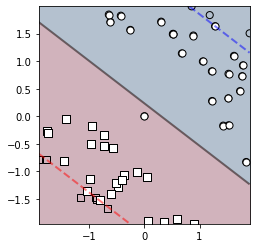

In [17]:
clf = SVC(kernel='linear', C=0.01)
clf = clf.fit(train_set, train_lbs)
draw_svm(clf, train_set, train_lbs, train_set[:, 0].min(), train_set[:, 0].max(), train_set[:, 1].min(), train_set[:, 1].max())

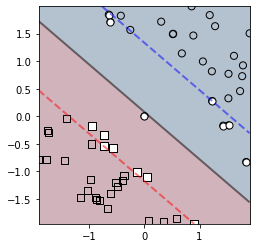

In [18]:
clf = SVC(kernel='linear', C=0.1)
clf = clf.fit(train_set, train_lbs)
draw_svm(clf, train_set, train_lbs, train_set[:, 0].min(), train_set[:, 0].max(), train_set[:, 1].min(), train_set[:, 1].max())

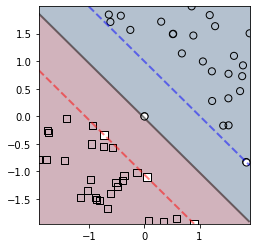

In [19]:
clf = SVC(kernel='linear', C=1)
clf = clf.fit(train_set, train_lbs)
draw_svm(clf, train_set, train_lbs, train_set[:, 0].min(), train_set[:, 0].max(), train_set[:, 1].min(), train_set[:, 1].max())

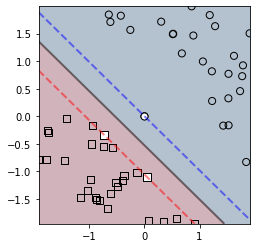

In [20]:
clf = SVC(kernel='linear', C=10)
clf = clf.fit(train_set, train_lbs)
draw_svm(clf, train_set, train_lbs, train_set[:, 0].min(), train_set[:, 0].max(), train_set[:, 1].min(), train_set[:, 1].max())

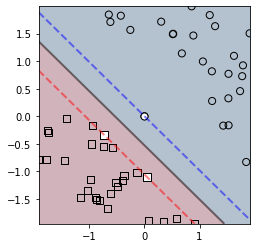

In [21]:
clf = SVC(kernel='linear', C=100)
clf = clf.fit(train_set, train_lbs)
draw_svm(clf, train_set, train_lbs, train_set[:, 0].min(), train_set[:, 0].max(), train_set[:, 1].min(), train_set[:, 1].max())